### 0. Imports

In [ ]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product, combinations

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("..\datos\online_shoppers_intention_clase_nonulls_estan.csv", index_col=0)

In [10]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Administrative_knn,ProductRelated_knn,BounceRates_knn
0,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,-0.263158,-0.566667,11.461524
1,-0.028789,0.0,0.0,-0.417913,2.095621,0.0,-0.263158,-0.533333,-0.221550
2,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,-0.263158,-0.566667,-0.221550
3,-0.028789,0.0,0.0,-0.465829,3.215621,0.0,-0.052632,-0.533333,2.699218
4,-0.028789,0.0,0.0,0.022315,0.695621,0.0,-0.263158,-0.266667,0.946757


In [23]:
def plot_outliers_univariados(dataframe, tipo_grafica="h", bins=30):
    df_num = df.select_dtypes(include=np.number)

    fig, axes = plt.subplots(nrows= math.ceil(len(df_num.columns) / 2), ncols=2, figsize=(15, 10))
    axes = axes.flat

    for ax, columna in zip(axes, df_num.columns):
        
        if tipo_grafica.lower() == "h":
            sns.histplot(x=columna, 
                         data=dataframe, 
                         ax= ax, 
                         bins = bins)
            
        elif tipo_grafica.lower() == "b":
            sns.boxplot(x=columna, 
                        data=dataframe, 
                        ax= ax,
                        flierprops={"markersize":2, "markerfacecolor":"red"})
        else:
            print("No has elegido una gráfica correcta")

        ax.set_title(f"Distribución variable {columna}")
        ax.set_xlabel(None)


    if len(df_num.columns) % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()

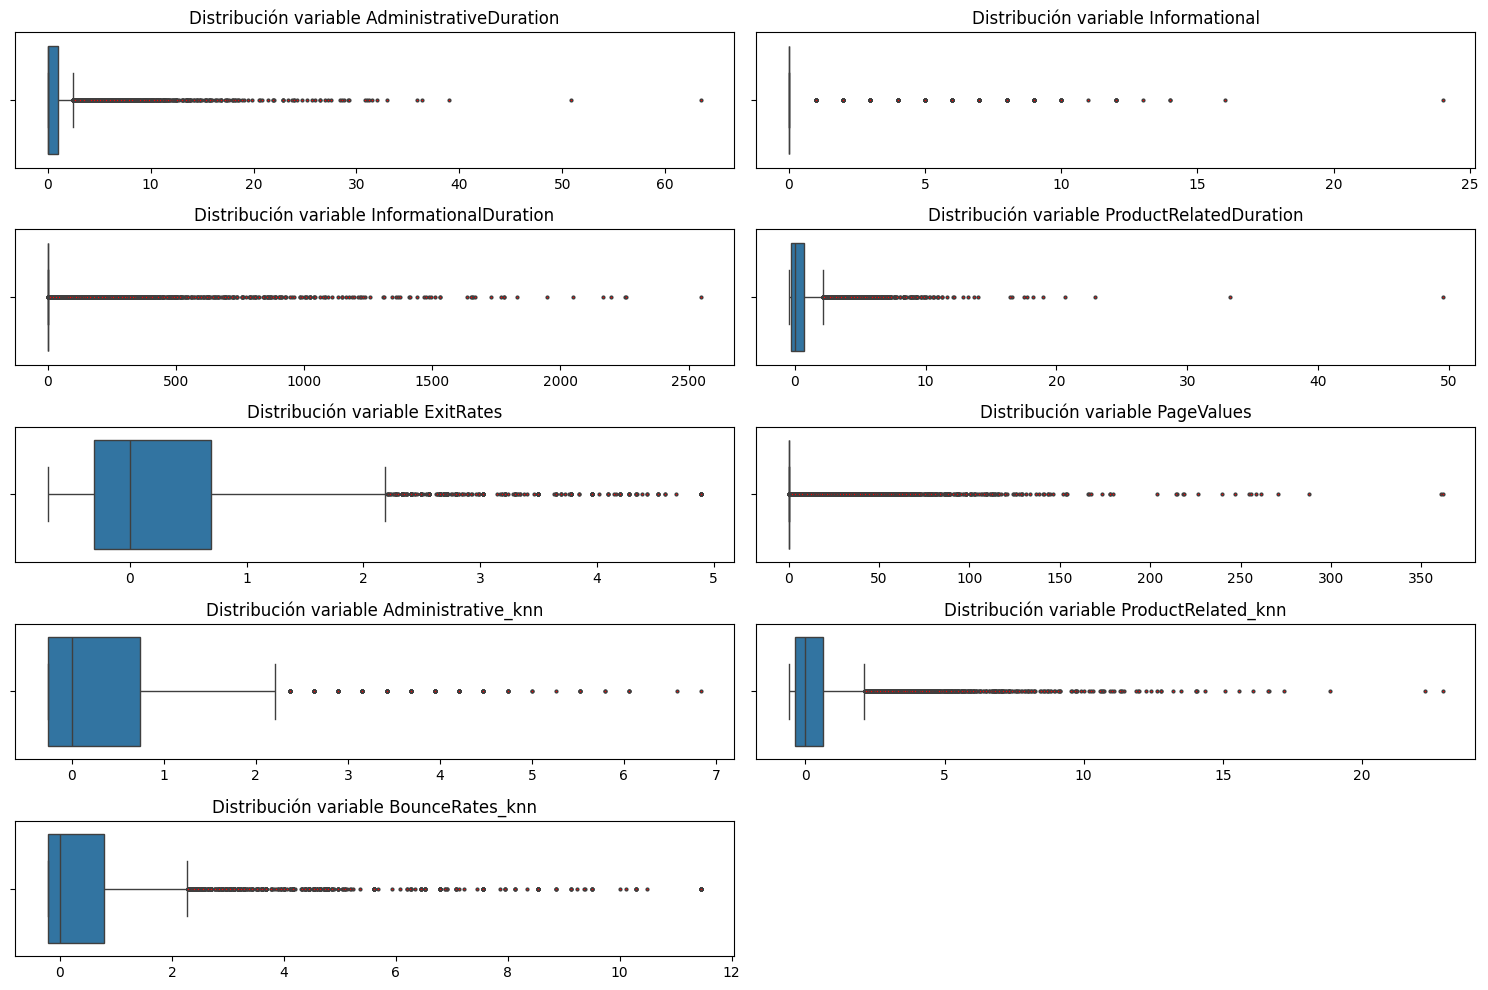

In [24]:
plot_outliers_univariados(df, tipo_grafica="b")

In [ ]:
def identificar_outliers_iqr(dataframe, lista_columnas_numericas, k = 1.5):
    diccionario_outliers = {}
    for columna in dataframe[lista_columnas_numericas].select_dtypes(include=np.number).columns:
        q1,q3 = np.nanpercentile(dataframe[columna], (25,75))
        iqr = q3 - q1

        limite_inferior = q1 - (k * iqr)
        limite_superior = q3 + (k * iqr)

        outlier_mask = (dataframe[columna] < limite_inferior) | (dataframe[columna] > limite_superior)

        # dataframe[f"{columna}_isoutlier"] = np.where(outlier_mask, 1, 0)
        df_outliers = dataframe[outlier_mask]

        if not df_outliers.empty:
            diccionario_outliers[columna] = df_outliers
    
    return diccionario_outliers



In [ ]:
def identificar_outliers_z(dataframe, lista_columnas_numericas, limite_desviaciones = 3):
    diccionario_outliers = []
    
    for columna in dataframe[lista_columnas_numericas].select_dtypes(include=np.number).columns:
        condicion_z_score = abs(zscore(dataframe[columna])) >= limite_desviaciones
        df_outliers = dataframe[condicion_z_score]

        if not df_outliers.empty:
            diccionario_outliers[columna] = df_outliers
    
    return diccionario_outliers

In [29]:
import multiprocessing

multiprocessing.cpu_count

<bound method BaseContext.cpu_count of <multiprocessing.context.DefaultContext object at 0x0000024FB94F3E90>>

In [ ]:
contaminaciones = [0.01,]

ifo = IsolationForest(random_state=42,
                      n_estimators=10,
                      contamination=contaminacion,
                      n_jobs=-1)

df["outliers_ifo_1"] = ifo.fit_predict(df[["PAgeValues","AdministrativeDuration","Informational"]])
df[df["outliers_ifo_1"] == -1]

array([-1,  1])

In [36]:
[*np.arange(0.001,0.1,0.001)]

[np.float64(0.001),
 np.float64(0.002),
 np.float64(0.003),
 np.float64(0.004),
 np.float64(0.005),
 np.float64(0.006),
 np.float64(0.007),
 np.float64(0.008),
 np.float64(0.009000000000000001),
 np.float64(0.010000000000000002),
 np.float64(0.011),
 np.float64(0.012),
 np.float64(0.013000000000000001),
 np.float64(0.014000000000000002),
 np.float64(0.015),
 np.float64(0.016),
 np.float64(0.017),
 np.float64(0.018000000000000002),
 np.float64(0.019000000000000003),
 np.float64(0.02),
 np.float64(0.021),
 np.float64(0.022000000000000002),
 np.float64(0.023),
 np.float64(0.024),
 np.float64(0.025),
 np.float64(0.026000000000000002),
 np.float64(0.027000000000000003),
 np.float64(0.028),
 np.float64(0.029),
 np.float64(0.030000000000000002),
 np.float64(0.031),
 np.float64(0.032),
 np.float64(0.033),
 np.float64(0.034),
 np.float64(0.035),
 np.float64(0.036000000000000004),
 np.float64(0.037000000000000005),
 np.float64(0.038),
 np.float64(0.039),
 np.float64(0.04),
 np.float64(0.041),
 n

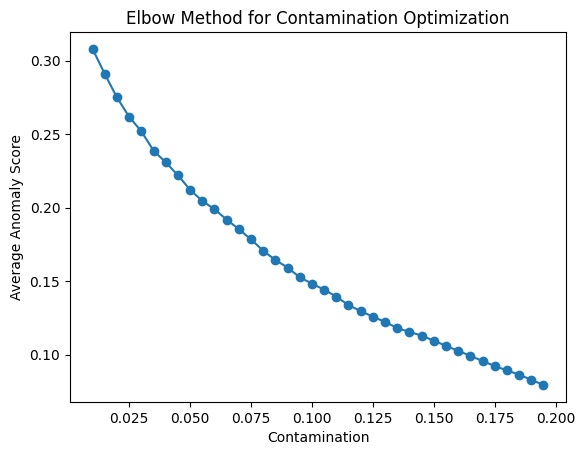

In [39]:
import matplotlib.pyplot as plt

contamination_values = [*np.arange(0.01,0.2,0.005)]
avg_anomaly_scores = []

for c in contamination_values:
    model = IsolationForest(contamination=c, random_state=42, n_estimators=500, n_jobs=-1)
    model.fit(df[["PageValues","AdministrativeDuration","Informational"]])
    avg_anomaly_scores.append(model.decision_function(df[["PageValues","AdministrativeDuration","Informational"]]).mean())

# Plot
plt.plot(contamination_values, avg_anomaly_scores, marker='o')
plt.xlabel('Contamination')
plt.ylabel('Average Anomaly Score')
plt.title('Elbow Method for Contamination Optimization')
plt.show()
